## Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn import metrics

## Baca Data
Membaca data dari file csv

In [ ]:
df = pd.read_csv('data/data_latih_analisisbeban.csv')
df.head()

,id,tegangan_R,tegangan_S,tegangan_T,arus_R,arus_S,arus_T,daya_R,daya_S,daya_T,...,frekuensi_S,frekuensi_T,arus_netral,I_avg_A,Selisih_R,Selisih_S,Selisih_T,Selisih_Max,persen,Kondisi
0,1,221.24,211.55,215.07,6.68,7.14,7.23,1403.99,1434.94,1477.21,...,50.52,50.04,4.78,7.016667,0.336667,0.123333,0.213333,0.336667,4.798100,Seimbang
1,2,238.52,225.94,218.36,9.90,9.32,9.71,2243.28,2000.47,2014.26,...,49.05,49.96,3.69,9.643333,0.256667,0.323333,0.066667,0.323333,3.352921,Seimbang
2,3,231.96,226.22,215.31,8.16,9.51,8.59,1798.15,2043.78,1757.04,...,49.04,49.05,1.77,8.753333,0.593333,0.756667,0.163333,0.756667,8.644326,Seimbang
3,4,227.96,229.12,212.66,5.02,5.65,5.12,1087.14,1229.80,1034.38,...,49.65,49.68,1.48,5.263333,0.243333,0.386667,0.143333,0.386667,7.346422,Seimbang
4,5,214.68,231.78,213.62,4.77,4.66,5.44,972.82,1026.09,1103.99,...,49.98,49.76,1.75,4.956667,0.186667,0.296667,0.483333,0.483333,9.751177,Seimbang


## Skenario I Analisis Kondisi Beban
### Menggunakan seluruh fitur pada dataset

Akurasi Model Klasifikasi
Random Forest (Bagging) - Train :  0.846875
Random Forest (Bagging) - Test :  0.8375


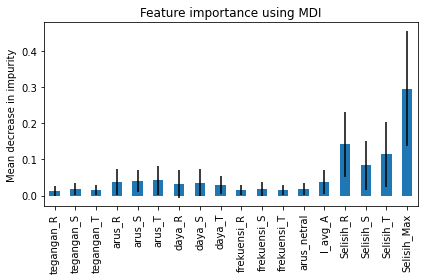

In [ ]:
# mengambil data latih dari dataset dan menghilangkan kolom id
data_latih = df.copy().drop(columns=['id'])
# Split variabel bebas dan terikat
X = data_latih.iloc[:,0:18].values  # independent variables
y = data_latih['Kondisi'].values # dependent variables

# Normalisasi
X = StandardScaler().fit_transform(X)

# Split data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                   random_state=2019)

# Training (Modeling menggunakan Random Forest)
from sklearn.ensemble import RandomForestClassifier

num_trees = 100

kfold = model_selection.StratifiedKFold(n_splits=2, random_state=2019,
                                       shuffle=True)

feature_names = list(data_latih.columns[0:18]) # mengambil nama fitur

clf_RF = RandomForestClassifier(n_estimators=num_trees).fit(X_train, y_train)
results = model_selection.cross_val_score(clf_RF, X_train, y_train, cv=kfold)

# Akurasi Model Klasifikasi
print("Akurasi Model Klasifikasi")
print("Random Forest (Bagging) - Train : ", results.mean())
print("Random Forest (Bagging) - Test : ", metrics.accuracy_score(clf_RF.predict(X_test), y_test))

# Grafik Fitur Penting
importances = clf_RF.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_RF.estimators_], axis=0)

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importance using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
plt.show()

# Menyimpan hasil pemodelan
#filename = 'model/rf_analisisbeban_model_I.sav'
#pickle.dump(clf_RF, open(filename, 'wb'))

## Skenario II Analisis Kondisi Beban
### Fitur : tegangan_R, tegangan_S, tegangan_T, arus_R, arus_S, arus_T, daya_R, daya_S, daya_T, frekuensi_R, frekuensi_S, frekuensi_T, arus_netral

In [ ]:
# Data latih pemodelan
data_latih = df.loc[:,['tegangan_R', 'tegangan_S', 'tegangan_T', 'arus_R', 'arus_S',
                       'arus_T', 'daya_R', 'daya_S', 'daya_T', 'frekuensi_R', 'frekuensi_S', 'frekuensi_T',
                       'arus_netral', 'Kondisi']]
data_latih.head()

,tegangan_R,tegangan_S,tegangan_T,arus_R,arus_S,arus_T,daya_R,daya_S,daya_T,frekuensi_R,frekuensi_S,frekuensi_T,arus_netral,Kondisi
0,221.24,211.55,215.07,6.68,7.14,7.23,1403.99,1434.94,1477.21,49.42,50.52,50.04,4.78,Seimbang
1,238.52,225.94,218.36,9.90,9.32,9.71,2243.28,2000.47,2014.26,49.05,49.05,49.96,3.69,Seimbang
2,231.96,226.22,215.31,8.16,9.51,8.59,1798.15,2043.78,1757.04,49.36,49.04,49.05,1.77,Seimbang
3,227.96,229.12,212.66,5.02,5.65,5.12,1087.14,1229.80,1034.38,50.17,49.65,49.68,1.48,Seimbang
4,214.68,231.78,213.62,4.77,4.66,5.44,972.82,1026.09,1103.99,49.84,49.98,49.76,1.75,Seimbang


Akurasi Model Klasifikasi
Random Forest (Bagging) - Train :  0.5562499999999999
Random Forest (Bagging) - Test :  0.65


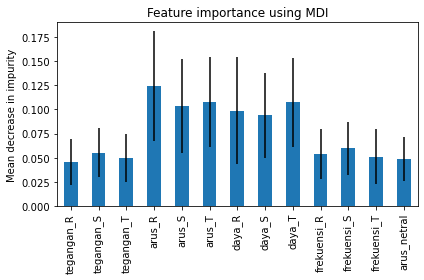

In [ ]:
# Split variabel bebas dan terikat
X = data_latih.iloc[:,0:13].values  # independent variables
y = data_latih['Kondisi'].values # dependent variables

# Normalisasi
X = StandardScaler().fit_transform(X)

# Split data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=2019)

# Training (Modeling menggunakan Random Forest)
from sklearn.ensemble import RandomForestClassifier

num_trees = 100

kfold = model_selection.StratifiedKFold(n_splits=2, random_state=2019,
                                       shuffle=True)

feature_names = list(data_latih.columns[0:13]) # mengambil nama fitur

clf_RF = RandomForestClassifier(n_estimators=num_trees).fit(X_train, y_train)
results = model_selection.cross_val_score(clf_RF, X_train, y_train, cv=kfold)

# Akurasi Model Klasifikasi
print("Akurasi Model Klasifikasi")
print("Random Forest (Bagging) - Train : ", results.mean())
print("Random Forest (Bagging) - Test : ", metrics.accuracy_score(clf_RF.predict(X_test), y_test))

# Grafik Fitur Penting
importances = clf_RF.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_RF.estimators_], axis=0)

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importance using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
plt.show()

# Menyimpan hasil pemodelan
#filename = 'model/rf_analisisbeban_model_II.sav'
#pickle.dump(clf_RF, open(filename, 'wb'))

## Skenario III Analisis Kondisi Beban
### Fitur : arus_R, arus_S, arus_T, arus_netral, I_avg_A, Selisih_R, Selisih_S, Selisih_T, Selisih_Max

In [ ]:
# Data latih pemodelan
data_latih = df.loc[:,['arus_R', 'arus_S', 'arus_T', 'arus_netral', 'I_avg_A', 'Selisih_R', 'Selisih_S',
                       'Selisih_T', 'Selisih_Max', 'Kondisi']]
data_latih.head()

,arus_R,arus_S,arus_T,arus_netral,I_avg_A,Selisih_R,Selisih_S,Selisih_T,Selisih_Max,Kondisi
0,6.68,7.14,7.23,4.78,7.016667,0.336667,0.123333,0.213333,0.336667,Seimbang
1,9.90,9.32,9.71,3.69,9.643333,0.256667,0.323333,0.066667,0.323333,Seimbang
2,8.16,9.51,8.59,1.77,8.753333,0.593333,0.756667,0.163333,0.756667,Seimbang
3,5.02,5.65,5.12,1.48,5.263333,0.243333,0.386667,0.143333,0.386667,Seimbang
4,4.77,4.66,5.44,1.75,4.956667,0.186667,0.296667,0.483333,0.483333,Seimbang


Akurasi Model Klasifikasi
Random Forest (Bagging) - Train :  0.865625
Random Forest (Bagging) - Test :  0.825


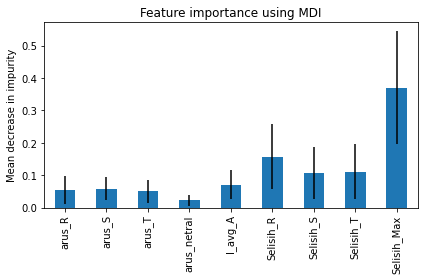

In [ ]:
# Split variabel bebas dan terikat
X = data_latih.iloc[:,0:9].values  # independent variables
y = data_latih['Kondisi'].values # dependent variables

# Normalisasi
X = StandardScaler().fit_transform(X)

# Split data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                   random_state=2019)

# Training (Modeling menggunakan Random Forest)
from sklearn.ensemble import RandomForestClassifier

num_trees = 100

kfold = model_selection.StratifiedKFold(n_splits=2, random_state=2019,
                                       shuffle=True)

feature_names = list(data_latih.columns[0:9]) # mengambil nama fitur

clf_RF = RandomForestClassifier(n_estimators=num_trees).fit(X_train, y_train)
results = model_selection.cross_val_score(clf_RF, X_train, y_train, cv=kfold)

# Akurasi Model Klasifikasi
print("Akurasi Model Klasifikasi")
print("Random Forest (Bagging) - Train : ", results.mean())
print("Random Forest (Bagging) - Test : ", metrics.accuracy_score(clf_RF.predict(X_test), y_test))

# Grafik Fitur Penting
importances = clf_RF.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_RF.estimators_], axis=0)

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importance using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
plt.show()

# Menyimpan hasil pemodelan
#filename = 'model/rf_analisisbeban_model_III.sav'
#pickle.dump(clf_RF, open(filename, 'wb'))

## Skenario IV Analisis Kondisi Beban
### Fitur : arus_R, arus_S, arus_T, I_avg_A, Selisih_Max

In [ ]:
# Data latih pemodelan
data_latih = df.loc[:,['arus_R', 'arus_S', 'arus_T', 'I_avg_A', 'Selisih_Max', 'Kondisi']]
data_latih.head()

,arus_R,arus_S,arus_T,I_avg_A,Selisih_Max,Kondisi
0,6.68,7.14,7.23,7.016667,0.336667,Seimbang
1,9.90,9.32,9.71,9.643333,0.323333,Seimbang
2,8.16,9.51,8.59,8.753333,0.756667,Seimbang
3,5.02,5.65,5.12,5.263333,0.386667,Seimbang
4,4.77,4.66,5.44,4.956667,0.483333,Seimbang


Akurasi Model Klasifikasi
Random Forest (Bagging) - Train :  0.903125
Random Forest (Bagging) - Test :  0.875


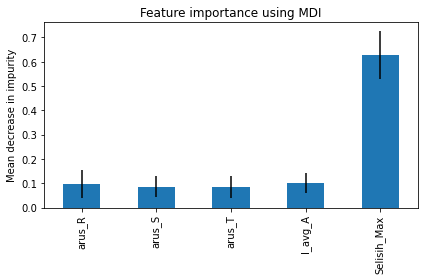

In [ ]:
# Split variabel bebas dan terikat
X = data_latih.iloc[:,0:5].values  # independent variables
y = data_latih['Kondisi'].values # dependent variables

# Normalisasi
X = StandardScaler().fit_transform(X)

# Split data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                   random_state=2019)

# Training (Modeling menggunakan Random Forest)
from sklearn.ensemble import RandomForestClassifier

num_trees = 100

kfold = model_selection.StratifiedKFold(n_splits=2, random_state=2019,
                                       shuffle=True)

feature_names = list(data_latih.columns[0:5]) # mengambil nama fitur

clf_RF = RandomForestClassifier(n_estimators=num_trees).fit(X_train, y_train)
results = model_selection.cross_val_score(clf_RF, X_train, y_train, cv=kfold)

# Akurasi Model Klasifikasi
print("Akurasi Model Klasifikasi")
print("Random Forest (Bagging) - Train : ", results.mean())
print("Random Forest (Bagging) - Test : ", metrics.accuracy_score(clf_RF.predict(X_test), y_test))

# Grafik Fitur Penting
importances = clf_RF.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_RF.estimators_], axis=0)

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importance using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
plt.show()

# Menyimpan hasil pemodelan
# filename = 'model/rf_analisisbeban_model_IV.sav'
# pickle.dump(clf_RF, open(filename, 'wb'))

## Skenario V Analisis Kondisi Beban
### Fitur : arus_R, arus_S, arus_T, Selisih_Max, rasio_selisih
atribut <b>rasio_selisih</b> diperoleh dengan membagi antara selisih maksimum dengan rata-rata arus

In [ ]:
data_latih = df.loc[:,['arus_R', 'arus_S', 'arus_T', 'I_avg_A', 'Selisih_Max', 'Kondisi']]
rasio_selisih = data_latih['Selisih_Max'] / data_latih['I_avg_A'] # menghitung rasio_selisih
data_latih.insert(5, 'Ratio_selisih', rasio_selisih)
data_latih = data_latih.drop(columns=['I_avg_A'])
data_latih.head()

,arus_R,arus_S,arus_T,Selisih_Max,Ratio_selisih,Kondisi
0,6.68,7.14,7.23,0.336667,0.047981,Seimbang
1,9.90,9.32,9.71,0.323333,0.033529,Seimbang
2,8.16,9.51,8.59,0.756667,0.086443,Seimbang
3,5.02,5.65,5.12,0.386667,0.073464,Seimbang
4,4.77,4.66,5.44,0.483333,0.097512,Seimbang


Akurasi Model Klasifikasi
Random Forest (Bagging) - Train :  0.9875
Random Forest (Bagging) - Test :  1.0


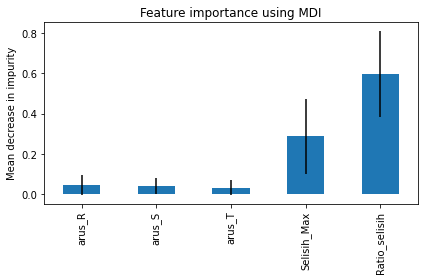

In [ ]:
# Split variabel bebas dan terikat
X = data_latih.iloc[:,0:5].values  # independent variables
y = data_latih['Kondisi'].values # dependent variables

# Normalisasi
X = StandardScaler().fit_transform(X)

# Split data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                   random_state=2019)

# Training (Modeling menggunakan Random Forest)
from sklearn.ensemble import RandomForestClassifier

num_trees = 100

kfold = model_selection.StratifiedKFold(n_splits=2, random_state=2019,
                                       shuffle=True)

feature_names = list(data_latih.columns[0:5]) # mengambil nama fitur

clf_RF = RandomForestClassifier(n_estimators=num_trees).fit(X_train, y_train)
results = model_selection.cross_val_score(clf_RF, X_train, y_train, cv=kfold)

# Akurasi Model Klasifikasi
print("Akurasi Model Klasifikasi")
print("Random Forest (Bagging) - Train : ", results.mean())
print("Random Forest (Bagging) - Test : ", metrics.accuracy_score(clf_RF.predict(X_test), y_test))

# Grafik Fitur Penting
importances = clf_RF.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_RF.estimators_], axis=0)

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importance using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
plt.show()

# Menyimpan hasil pemodelan
# filename = 'model/rf_analisisbeban_model_V.sav'
# pickle.dump(clf_RF, open(filename, 'wb'))

## Prediksi kondisi beban menggunakan data dari sensor

In [ ]:
df_sensor = pd.read_csv('data/db_sensor_uji_analisisbeban.csv')
df_sensor.head()

,id,arus_R,arus_S,arus_T,tegangan_R,tegangan_S,tegangan_T,daya_R,daya_S,daya_T,...,arus_netral,beban_1,beban_2,beban_3,beban_4,beban_5,beban_6,beban_7,beban_8,timestamp
0,1,0.12,0.12,0.0,229.9,230.0,229.8,6.7,6.5,0.0,...,0.21,0.0,0.2,0.44,0.20,0.2,0.2,0.21,1.24,2025-07-06 16:21:50
1,2,0.12,0.12,0.0,229.8,229.9,229.7,6.7,6.6,0.0,...,0.20,0.0,0.0,0.40,0.21,0.0,0.2,0.21,1.19,2025-07-06 16:21:54
2,3,0.12,0.12,0.0,229.8,229.9,229.7,6.6,6.5,0.0,...,0.20,0.0,0.0,0.41,0.00,0.0,0.2,0.20,1.18,2025-07-06 16:21:58
3,4,0.12,0.12,0.0,230.0,230.1,229.9,6.7,6.5,0.0,...,0.20,0.0,0.2,0.36,0.00,0.0,0.2,0.21,1.20,2025-07-06 16:22:02
4,5,0.12,0.12,0.0,229.9,230.0,229.8,6.7,6.5,0.0,...,0.20,0.0,0.0,0.36,0.00,0.0,0.2,0.21,1.16,2025-07-06 16:22:07


In [ ]:
# Menghitung I_avg_A, Selisih_R, Selisih_S, Selisih_T, Selisih_Max dari data sensor dan memasukkan ke dalam data uji
data_uji = df_sensor.loc[:,['tegangan_R', 'tegangan_S', 'tegangan_T', 'arus_R', 'arus_S',
                                    'arus_T', 'daya_R', 'daya_S', 'daya_T', 'frekuensi_R', 'frekuensi_S', 'frekuensi_T',
                                    'arus_netral']]
data_uji['I_avg_A'] = data_uji[['arus_R', 'arus_S', 'arus_T']].mean(axis=1)
data_uji['Selisih_R'] = (data_uji['arus_R'] - data_uji['I_avg_A']).abs()
data_uji['Selisih_S'] = (data_uji['arus_S'] - data_uji['I_avg_A']).abs()
data_uji['Selisih_T'] = (data_uji['arus_T'] - data_uji['I_avg_A']).abs()
data_uji['Selisih_Max'] = data_uji[['Selisih_R', 'Selisih_S', 'Selisih_T']].max(axis=1)
rasio_selisih = data_uji['Selisih_Max'] / data_uji['I_avg_A'] # menghitung rasio_selisih
data_uji.insert(18, 'Rasio_selisih', rasio_selisih)

data_uji.head()

,tegangan_R,tegangan_S,tegangan_T,arus_R,arus_S,arus_T,daya_R,daya_S,daya_T,frekuensi_R,frekuensi_S,frekuensi_T,arus_netral,I_avg_A,Selisih_R,Selisih_S,Selisih_T,Selisih_Max,Rasio_selisih
0,229.9,230.0,229.8,0.12,0.12,0.0,6.7,6.5,0.0,49.9,49.9,49.9,0.21,0.08,0.04,0.04,0.08,0.08,1.0
1,229.8,229.9,229.7,0.12,0.12,0.0,6.7,6.6,0.0,50.0,49.9,50.0,0.20,0.08,0.04,0.04,0.08,0.08,1.0
2,229.8,229.9,229.7,0.12,0.12,0.0,6.6,6.5,0.0,50.0,50.0,50.0,0.20,0.08,0.04,0.04,0.08,0.08,1.0
3,230.0,230.1,229.9,0.12,0.12,0.0,6.7,6.5,0.0,50.0,50.1,50.0,0.20,0.08,0.04,0.04,0.08,0.08,1.0
4,229.9,230.0,229.8,0.12,0.12,0.0,6.7,6.5,0.0,50.0,50.0,50.0,0.20,0.08,0.04,0.04,0.08,0.08,1.0


In [ ]:
# Prediksi menggunakan model I

# load model I
filename = 'model/rf_analisisbeban_model_I.sav'
load_model_I = pickle.load(open(filename, 'rb'))

# Klasifikasi kondisi data sensor
X_test = data_uji.iloc[:,0:18].values
y_pred = load_model_I.predict(X_test)
data_uji['Kondisi'] = y_pred
data_uji.head()

,tegangan_R,tegangan_S,tegangan_T,arus_R,arus_S,arus_T,daya_R,daya_S,daya_T,frekuensi_R,frekuensi_S,frekuensi_T,arus_netral,I_avg_A,Selisih_R,Selisih_S,Selisih_T,Selisih_Max,Rasio_selisih,Kondisi
0,229.9,230.0,229.8,0.12,0.12,0.0,6.7,6.5,0.0,49.9,49.9,49.9,0.21,0.08,0.04,0.04,0.08,0.08,1.0,Tidak Seimbang
1,229.8,229.9,229.7,0.12,0.12,0.0,6.7,6.6,0.0,50.0,49.9,50.0,0.20,0.08,0.04,0.04,0.08,0.08,1.0,Tidak Seimbang
2,229.8,229.9,229.7,0.12,0.12,0.0,6.6,6.5,0.0,50.0,50.0,50.0,0.20,0.08,0.04,0.04,0.08,0.08,1.0,Tidak Seimbang
3,230.0,230.1,229.9,0.12,0.12,0.0,6.7,6.5,0.0,50.0,50.1,50.0,0.20,0.08,0.04,0.04,0.08,0.08,1.0,Tidak Seimbang
4,229.9,230.0,229.8,0.12,0.12,0.0,6.7,6.5,0.0,50.0,50.0,50.0,0.20,0.08,0.04,0.04,0.08,0.08,1.0,Tidak Seimbang


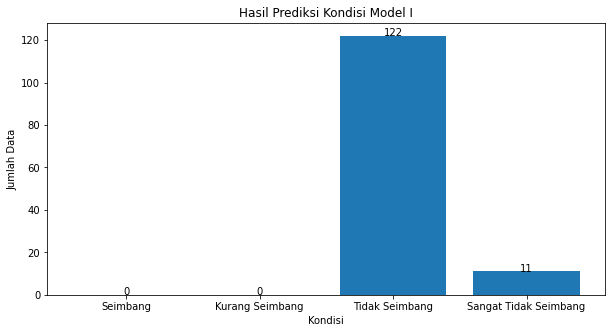

In [ ]:
def add_labels(x, y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha='center')

x = ['Seimbang', 'Kurang Seimbang', 'Tidak Seimbang', 'Sangat Tidak Seimbang']
y = []
y.append((data_uji['Kondisi']==x[0]).sum())
y.append((data_uji['Kondisi']==x[1]).sum())
y.append((data_uji['Kondisi']==x[2]).sum())
y.append((data_uji['Kondisi']==x[3]).sum())

plt.figure(figsize=(10, 5))
plt.bar(x, y)
add_labels(x, y)

plt.title("Hasil Prediksi Kondisi Model I")
plt.xlabel("Kondisi")
plt.ylabel("Jumlah Data")

plt.show()

In [ ]:
# Prediksi menggunakan model II

# load model II
filename = 'model/rf_analisisbeban_model_II.sav'
load_model_II = pickle.load(open(filename, 'rb'))

# Klasifikasi kondisi data sensor
X_test = data_uji.loc[:,['tegangan_R', 'tegangan_S', 'tegangan_T', 'arus_R', 'arus_S',
                       'arus_T', 'daya_R', 'daya_S', 'daya_T', 'frekuensi_R', 'frekuensi_S', 'frekuensi_T',
                       'arus_netral']].values
y_pred = load_model_II.predict(X_test)
data_uji['Kondisi'] = y_pred
data_uji.head()

,tegangan_R,tegangan_S,tegangan_T,arus_R,arus_S,arus_T,daya_R,daya_S,daya_T,frekuensi_R,frekuensi_S,frekuensi_T,arus_netral,I_avg_A,Selisih_R,Selisih_S,Selisih_T,Selisih_Max,Rasio_selisih,Kondisi
0,229.9,230.0,229.8,0.12,0.12,0.0,6.7,6.5,0.0,49.9,49.9,49.9,0.21,0.08,0.04,0.04,0.08,0.08,1.0,Tidak Seimbang
1,229.8,229.9,229.7,0.12,0.12,0.0,6.7,6.6,0.0,50.0,49.9,50.0,0.20,0.08,0.04,0.04,0.08,0.08,1.0,Tidak Seimbang
2,229.8,229.9,229.7,0.12,0.12,0.0,6.6,6.5,0.0,50.0,50.0,50.0,0.20,0.08,0.04,0.04,0.08,0.08,1.0,Tidak Seimbang
3,230.0,230.1,229.9,0.12,0.12,0.0,6.7,6.5,0.0,50.0,50.1,50.0,0.20,0.08,0.04,0.04,0.08,0.08,1.0,Tidak Seimbang
4,229.9,230.0,229.8,0.12,0.12,0.0,6.7,6.5,0.0,50.0,50.0,50.0,0.20,0.08,0.04,0.04,0.08,0.08,1.0,Tidak Seimbang


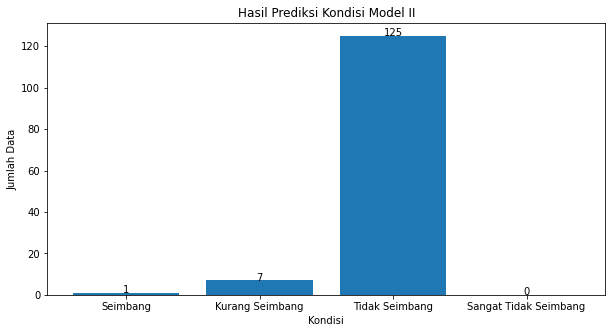

In [ ]:
def add_labels(x, y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha='center')

x = ['Seimbang', 'Kurang Seimbang', 'Tidak Seimbang', 'Sangat Tidak Seimbang']
y = []
y.append((data_uji['Kondisi']==x[0]).sum())
y.append((data_uji['Kondisi']==x[1]).sum())
y.append((data_uji['Kondisi']==x[2]).sum())
y.append((data_uji['Kondisi']==x[3]).sum())

plt.figure(figsize=(10, 5))
plt.bar(x, y)
add_labels(x, y)

plt.title("Hasil Prediksi Kondisi Model II")
plt.xlabel("Kondisi")
plt.ylabel("Jumlah Data")

plt.show()

In [ ]:
# Prediksi menggunakan model III

# load model III
filename = 'model/rf_analisisbeban_model_III.sav'
load_model_III = pickle.load(open(filename, 'rb'))

# Klasifikasi kondisi data sensor
X_test = data_uji.loc[:,['arus_R', 'arus_S', 'arus_T', 'arus_netral', 'I_avg_A', 'Selisih_R', 'Selisih_S', 'Selisih_T',
                         'Selisih_Max']].values
y_pred = load_model_III.predict(X_test)
data_uji['Kondisi'] = y_pred
data_uji.head()

,tegangan_R,tegangan_S,tegangan_T,arus_R,arus_S,arus_T,daya_R,daya_S,daya_T,frekuensi_R,frekuensi_S,frekuensi_T,arus_netral,I_avg_A,Selisih_R,Selisih_S,Selisih_T,Selisih_Max,Rasio_selisih,Kondisi
0,229.9,230.0,229.8,0.12,0.12,0.0,6.7,6.5,0.0,49.9,49.9,49.9,0.21,0.08,0.04,0.04,0.08,0.08,1.0,Tidak Seimbang
1,229.8,229.9,229.7,0.12,0.12,0.0,6.7,6.6,0.0,50.0,49.9,50.0,0.20,0.08,0.04,0.04,0.08,0.08,1.0,Tidak Seimbang
2,229.8,229.9,229.7,0.12,0.12,0.0,6.6,6.5,0.0,50.0,50.0,50.0,0.20,0.08,0.04,0.04,0.08,0.08,1.0,Tidak Seimbang
3,230.0,230.1,229.9,0.12,0.12,0.0,6.7,6.5,0.0,50.0,50.1,50.0,0.20,0.08,0.04,0.04,0.08,0.08,1.0,Tidak Seimbang
4,229.9,230.0,229.8,0.12,0.12,0.0,6.7,6.5,0.0,50.0,50.0,50.0,0.20,0.08,0.04,0.04,0.08,0.08,1.0,Tidak Seimbang


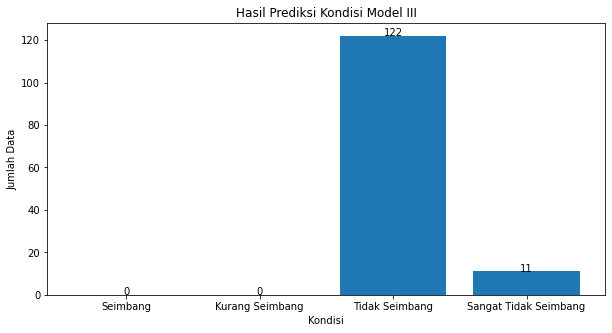

In [ ]:
def add_labels(x, y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha='center')

x = ['Seimbang', 'Kurang Seimbang', 'Tidak Seimbang', 'Sangat Tidak Seimbang']
y = []
y.append((data_uji['Kondisi']==x[0]).sum())
y.append((data_uji['Kondisi']==x[1]).sum())
y.append((data_uji['Kondisi']==x[2]).sum())
y.append((data_uji['Kondisi']==x[3]).sum())

plt.figure(figsize=(10, 5))
plt.bar(x, y)
add_labels(x, y)

plt.title("Hasil Prediksi Kondisi Model III")
plt.xlabel("Kondisi")
plt.ylabel("Jumlah Data")

plt.show()

In [ ]:
# Prediksi menggunakan model IV

# load model IV
filename = 'model/rf_analisisbeban_model_IV.sav'
load_model_IV = pickle.load(open(filename, 'rb'))

# Klasifikasi kondisi data sensor
X_test = data_uji.loc[:,['arus_R', 'arus_S', 'arus_T', 'I_avg_A', 'Selisih_Max']].values
y_pred = load_model_IV.predict(X_test)
data_uji['Kondisi'] = y_pred
data_uji.head()

,tegangan_R,tegangan_S,tegangan_T,arus_R,arus_S,arus_T,daya_R,daya_S,daya_T,frekuensi_R,frekuensi_S,frekuensi_T,arus_netral,I_avg_A,Selisih_R,Selisih_S,Selisih_T,Selisih_Max,Rasio_selisih,Kondisi
0,229.9,230.0,229.8,0.12,0.12,0.0,6.7,6.5,0.0,49.9,49.9,49.9,0.21,0.08,0.04,0.04,0.08,0.08,1.0,Tidak Seimbang
1,229.8,229.9,229.7,0.12,0.12,0.0,6.7,6.6,0.0,50.0,49.9,50.0,0.20,0.08,0.04,0.04,0.08,0.08,1.0,Tidak Seimbang
2,229.8,229.9,229.7,0.12,0.12,0.0,6.6,6.5,0.0,50.0,50.0,50.0,0.20,0.08,0.04,0.04,0.08,0.08,1.0,Tidak Seimbang
3,230.0,230.1,229.9,0.12,0.12,0.0,6.7,6.5,0.0,50.0,50.1,50.0,0.20,0.08,0.04,0.04,0.08,0.08,1.0,Tidak Seimbang
4,229.9,230.0,229.8,0.12,0.12,0.0,6.7,6.5,0.0,50.0,50.0,50.0,0.20,0.08,0.04,0.04,0.08,0.08,1.0,Tidak Seimbang


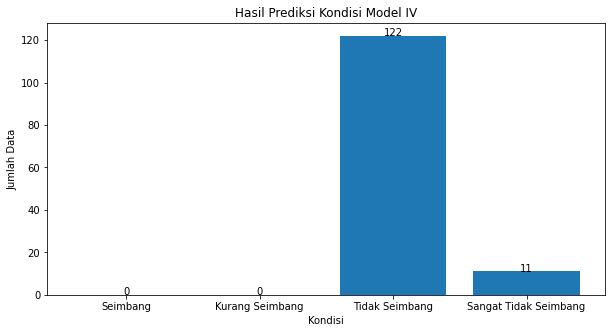

In [ ]:
def add_labels(x, y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha='center')

x = ['Seimbang', 'Kurang Seimbang', 'Tidak Seimbang', 'Sangat Tidak Seimbang']
y = []
y.append((data_uji['Kondisi']==x[0]).sum())
y.append((data_uji['Kondisi']==x[1]).sum())
y.append((data_uji['Kondisi']==x[2]).sum())
y.append((data_uji['Kondisi']==x[3]).sum())

plt.figure(figsize=(10, 5))
plt.bar(x, y)
add_labels(x, y)

plt.title("Hasil Prediksi Kondisi Model IV")
plt.xlabel("Kondisi")
plt.ylabel("Jumlah Data")

plt.show()

In [ ]:
# Prediksi menggunakan model V

# load model V
filename = 'model/rf_analisisbeban_model_IV.sav'
load_model_IV = pickle.load(open(filename, 'rb'))

# Klasifikasi kondisi data sensor
X_test = data_uji.loc[0:123,['arus_R', 'arus_S', 'arus_T', 'Selisih_Max', 'Rasio_selisih']].values
y_pred = load_model_IV.predict(X_test)
data_uji.loc[0:123, ['Kondisi']] = y_pred
data_uji.head()

,tegangan_R,tegangan_S,tegangan_T,arus_R,arus_S,arus_T,daya_R,daya_S,daya_T,frekuensi_R,frekuensi_S,frekuensi_T,arus_netral,I_avg_A,Selisih_R,Selisih_S,Selisih_T,Selisih_Max,Rasio_selisih,Kondisi
0,229.9,230.0,229.8,0.12,0.12,0.0,6.7,6.5,0.0,49.9,49.9,49.9,0.21,0.08,0.04,0.04,0.08,0.08,1.0,Sangat Tidak Seimbang
1,229.8,229.9,229.7,0.12,0.12,0.0,6.7,6.6,0.0,50.0,49.9,50.0,0.20,0.08,0.04,0.04,0.08,0.08,1.0,Sangat Tidak Seimbang
2,229.8,229.9,229.7,0.12,0.12,0.0,6.6,6.5,0.0,50.0,50.0,50.0,0.20,0.08,0.04,0.04,0.08,0.08,1.0,Sangat Tidak Seimbang
3,230.0,230.1,229.9,0.12,0.12,0.0,6.7,6.5,0.0,50.0,50.1,50.0,0.20,0.08,0.04,0.04,0.08,0.08,1.0,Sangat Tidak Seimbang
4,229.9,230.0,229.8,0.12,0.12,0.0,6.7,6.5,0.0,50.0,50.0,50.0,0.20,0.08,0.04,0.04,0.08,0.08,1.0,Sangat Tidak Seimbang


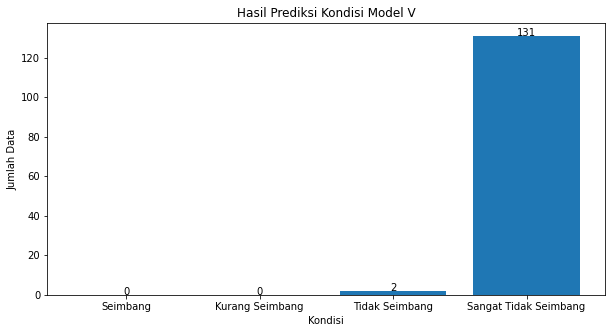

In [ ]:
def add_labels(x, y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha='center')

x = ['Seimbang', 'Kurang Seimbang', 'Tidak Seimbang', 'Sangat Tidak Seimbang']
y = []
y.append((data_uji['Kondisi']==x[0]).sum())
y.append((data_uji['Kondisi']==x[1]).sum())
y.append((data_uji['Kondisi']==x[2]).sum())
y.append((data_uji['Kondisi']==x[3]).sum())

plt.figure(figsize=(10, 5))
plt.bar(x, y)
add_labels(x, y)

plt.title("Hasil Prediksi Kondisi Model V")
plt.xlabel("Kondisi")
plt.ylabel("Jumlah Data")

plt.show()